In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation as am
import matplotlib.colors as mcolors
from scipy.optimize import minimize
import data_processing 
from functools import reduce
np.set_printoptions(precision=3, suppress=True)

In [5]:
filenames = [
    'PCNA_23-24C_05072022-01.xls', # 0 
    'Part2_PCNA_23-24C_26072022-03_Detailed.csv', 
    'PCNA_23-24C_12072022-01.csv', 
    'PCNA_23-24C_13072022-02_Detailed.csv',
    'PCNA_24-25C_12082022-01_AcquisitionBlock1_pt1_Detailed.csv', 
    'PCNA_24-25C_12082022-01_AcquisitionBlock2_pt2_Detailed.csv',
    
    'PCNA_from 1cell_11042023-01_AcquisitionBlock1_pt1_Detailed.csv', # 6
    'PCNA_06062022-01-2_AcquisitionBlock1_pt1.csv',
    'PCNA_06062022-01-2_AcquisitionBlock2_pt2.csv',
    'PCNA_07062022-01-1_AcquisitionBlock1_pt1.csv',
    'PCNA_07062022-01-1_AcquisitionBlock2_pt2.csv',
    'PCNA_07062022-01-1_AcquisitionBlock3_pt3.csv',
    
    'wee1 inhibitor in PCNA_2602023-01_AcquisitionBlock1_pt1_Detailed.csv',
    'wee1 inhibitor in PCNA_2602023-01_AcquisitionBlock2_pt2_Detailed.csv',
    'chek1_12pg_11082023-01-2_AcquisitionBlock1_Detailed.csv',
    'chek1_12pg_11082023-01-2_AcquisitionBlock2_Detailed.csv',
    'Continuous Wee1 inh_50uM_14082023-01_AcquisitionBlock1_Detailed.csv',
    'Continuous Wee1 inh_50uM_14082023-01_AcquisitionBlock2_Detailed.csv', 
    
    '0_35pc DMSO_PCNA_28072023-01-1_AcquisitionBlock1_Detailed.csv', 
    '0_35pc DMSO_PCNA_28072023-01-1_AcquisitionBlock2_Detailed.csv', 
    
    'AurB_chek1_12pg_25082023-01_AcquisitionBlock1.csv', # AurB + chek 1 
    'AurB_chek1_12pg_25082023-01_AcquisitionBlock2.csv', 
    'AurB_chek1_12pg_25082023-01_AcquisitionBlock3.csv',
    'AurB_Chek1_12pg_23082023-01_AcquisitionBlock2.csv', 
    'AurB inh in PCNA_21072023-01_AcquisitionBlock2.csv', # AurB only 
    
    'LatB_02102023-01_AcquisitionBlock1.csv', # LatB 
    'LatB_02102023-01_AcquisitionBlock2.csv', 
    'LatB_04102023-01-3_AcquisitionBlock1.csv', 
    'LatB_04102023-01-3_AcquisitionBlock2_Detailed.csv'
]
frame_to_times = [
    18.86, 18.88, 18.87, 18.87, 37.16, 37.16, 
    38.97, 52, 52, 52, 52, 52, 
    39.86, 39.86, 39.86, 39.86, 39.86, 39.86, 
    39.86, 39.86, 
    57.4, 57.4, 57.4, 38.6, 38.07, 
    41.5, 41.5, 41.5, 41.5
]

start_frames = [
    [ 55, 158, 255, 350, 444, 536, 628], # PCNA 
    [52, 145, 238, 334, 405, 514, 641],
    [42, 143, 241, 336, 430, 524], 
    [ 53, 147, 238, 327, 419, 514, 616, 671],
    [ 26,  72, 118, 162, 206, 251, 287, 337],
    [ 26,  73, 118, 162, 206, 251, 289, 329],
    
    [ 26,  74, 120, 164, 207, 250, 293, 333],
    [  8,  44,  80, 113, 145, 176, 209, 240],
    [  3,  38,  72, 103, 134, 166, 198, 231], # PCNA 
    [ 41,  73, 104, 135, 167, 199, 217],
    [ 39,  69,  99, 129, 160, 191, 226],
    [39,  71, 103, 134, 166, 199, 234],
    
    [  9,  43,  78, 114, 148, 184, 215, 258, 304], # wee1 
    [  9,  43,  78, 114, 148, 184, 223, 258, 304], # wee1 
    [ 10,  53,  95, 136, 178, 223], # chek1
    [  7,  50,  92, 133, 174, 215, 257], # check1 
    [ 17,  51,  87, 121, 164], # cont_wee1 
    [ 18,  54,  91, 128, 168, 212, 252, 299], # cont_wee1 
    
    [ 15,  52,  89, 126, 161, 197, 234, 270, 306, 357], # DMSO 
    [ 20,  56,  93, 129, 164, 200, 237, 274, 311, 359],
    
    [3, 32,  62,  92, 123, 156, 191, 224, 260, 314],
    [8, 38,  69, 100,   130, 162, 195, 235, 319, 425],
    [ 17,  48,  78, 109, 141, 174, 205, 239, 286],
    [ 25,  70, 115, 160, 207, 255, 345, 422],
    [ 18,  57,  96, 136, 175, 216, 259, 336],
    
    [7,  49,  92, 134, 176, 219, 262, 309, 367],
    [6,  47,  89, 132, 174, 218, 264, 310], 
    [7,  50,  94, 136, 179, 222, 264, 305],
    [5,  47,  91, 135, 177, 220, 265, 310],
]

n = 1

filename = 'data/'+filenames[n]
f_start = np.array(start_frames[n])

p = data_processing.Processor(filename, 2, frame_to_times[n], inject=False)

/Users/yuli/Documents/Code/MitoticWaves/data_processing.py:18: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  self.df = pd.read_csv(filename, header=header, encoding='latin-1')


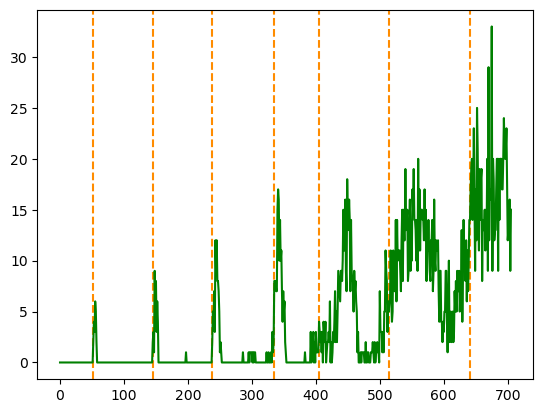

[52, 145, 238, 334, 405, 514, 641]


In [6]:
find_f_start = False
z_cutoff = 10

f_start = start_frames[n]

if find_f_start:
    p.process(f_start=None, smoothing_width=2, round_number=2, z_cutoff=z_cutoff)
else: 
    p.process(f_start=f_start, round_number=2)

divs = np.array([d['count']-np.sum(d['z']<z_cutoff) for d in p.divisions])

for f in p.f_start: 
    plt.axvline(x=f, color='darkorange', linestyle='--')
plt.plot(divs, 'g-')
plt.show() 

print(repr(p.f_start))

## Next, we will find the semi-major and semi-minor axes of the ellipse in the x-y plane to look at the geometry in 2D 

In [7]:
surface = True

In [18]:
plot = False 

if surface: # if there are surface cells 

    spherical_polar = p.get_spherical_polar(6) 
    p.label_surface_cells(spherical_polar)

    if plot: 
        for index in range(0, len(p.rounds)):
            s = p.rounds[index]['sur']
            polar = np.array(spherical_polar[index])[s]
            d, phi, theta, D = polar.T
            fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6, 6))
            im = ax.scatter(phi, theta, c=d/D)
            ax.set_ylim([0, np.pi/2])
            ax.set_yticklabels([])
            plt.colorbar(im)
            plt.show() 

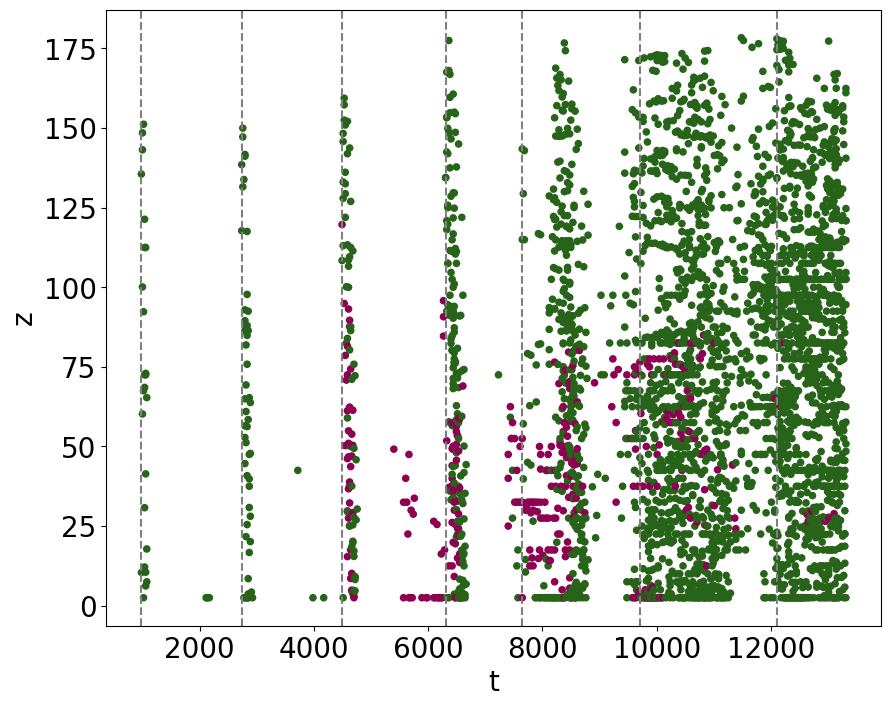

In [20]:
p.plot_z(filename[5:-4], save=True, omega0=0) # green: surface cells 

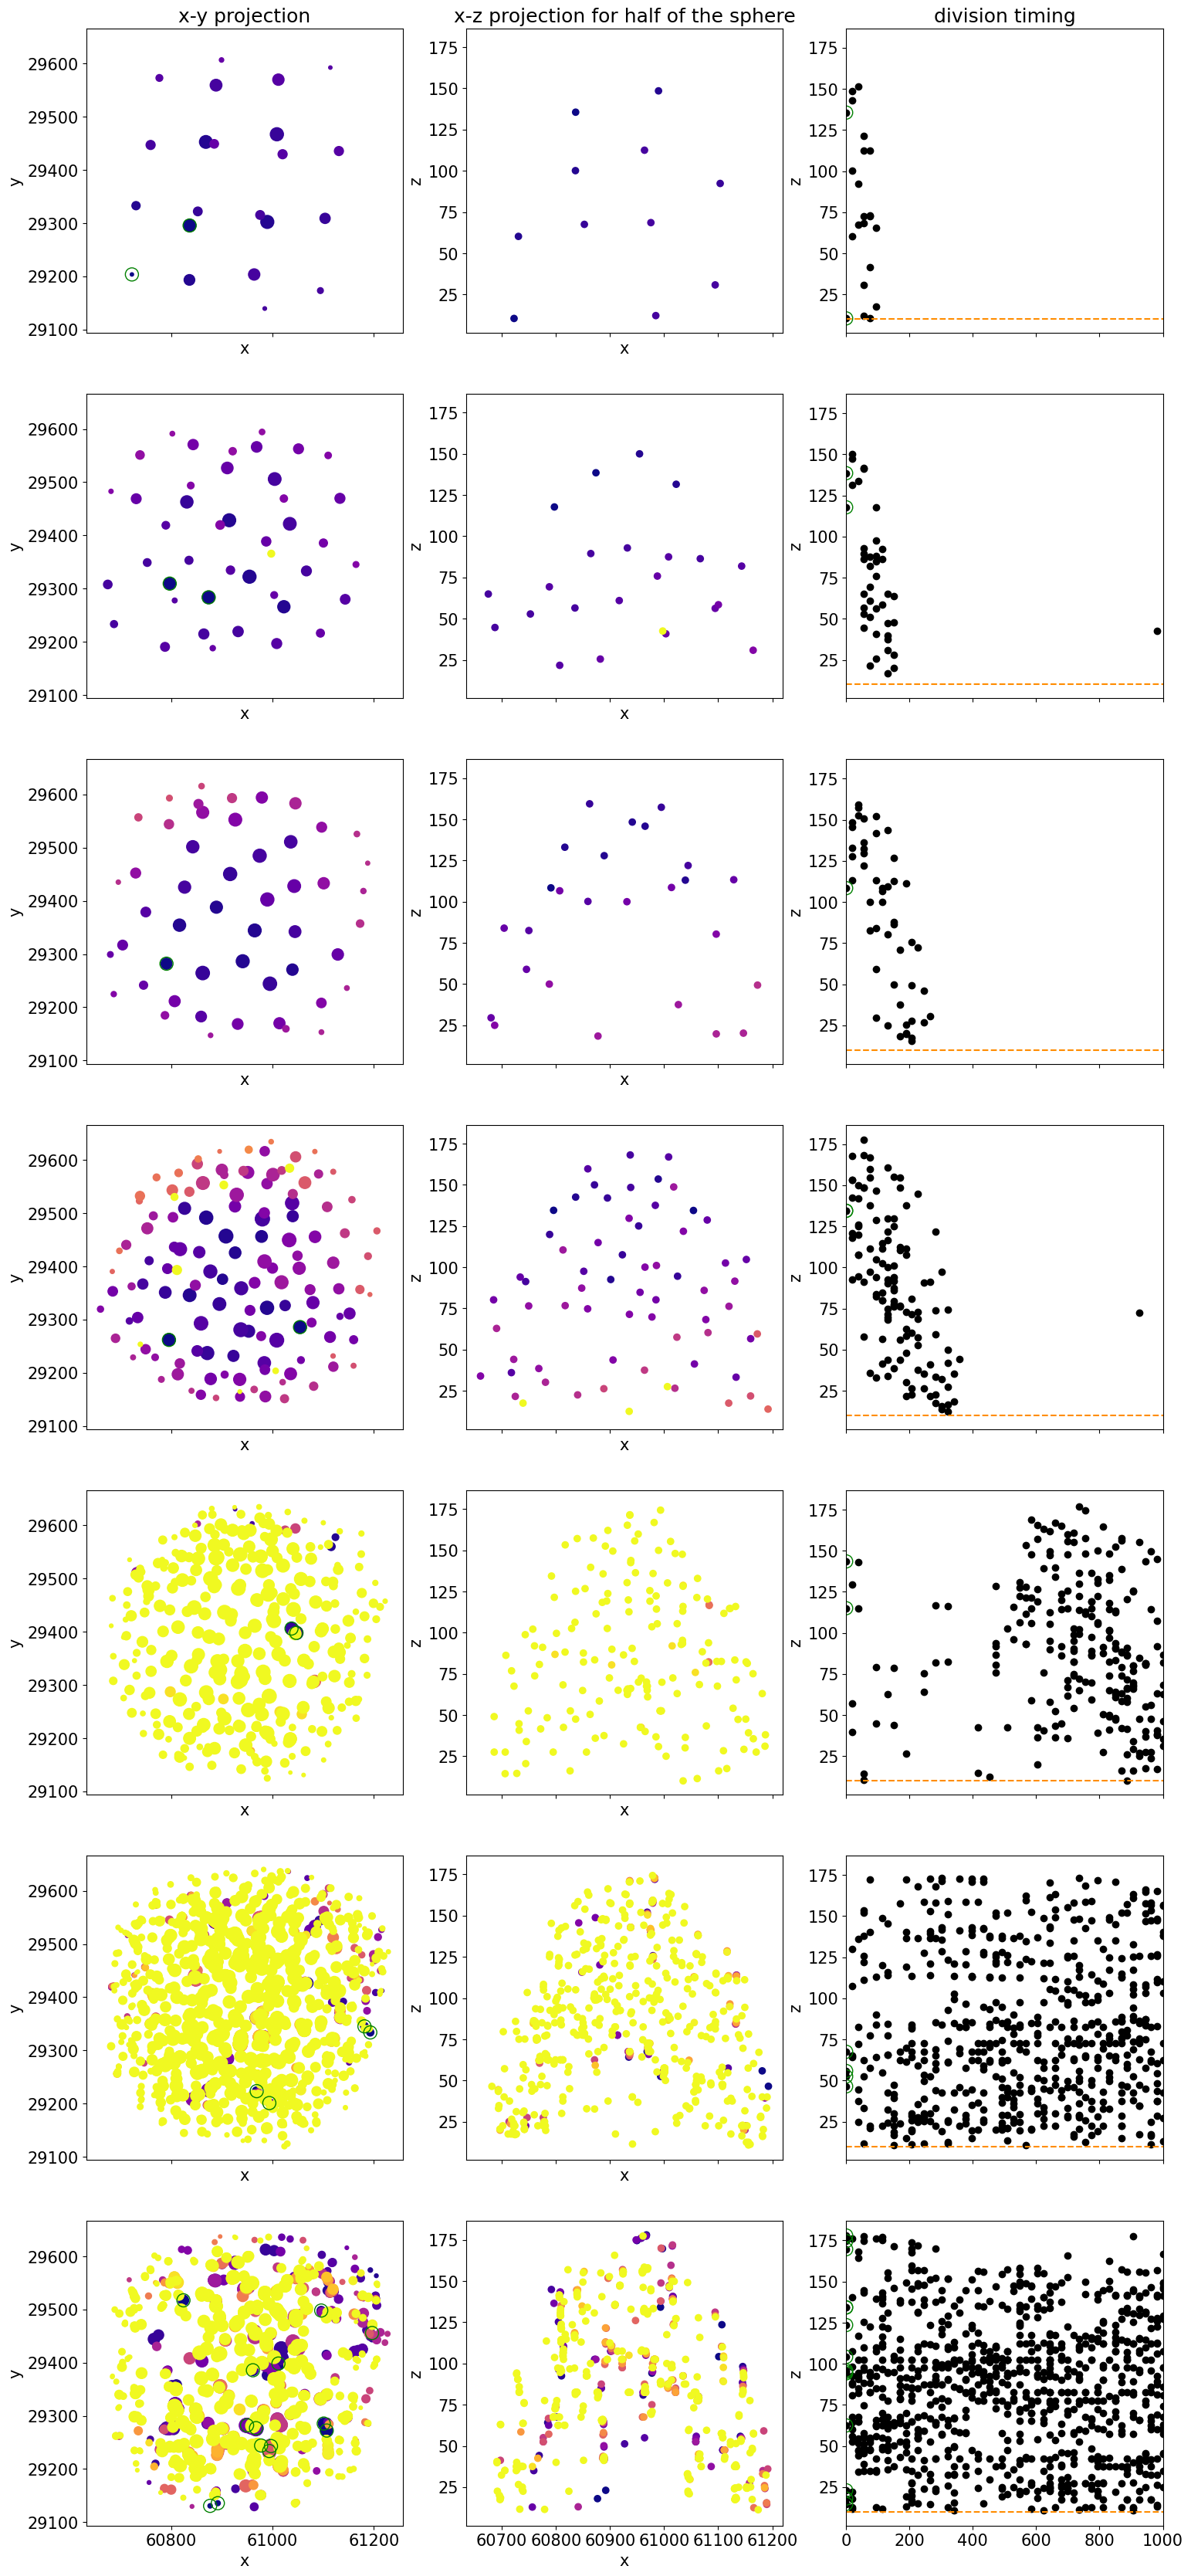

In [21]:
p.plot_rounds(filename[5:-4], surface=surface, z_cutoff=10, save=True)

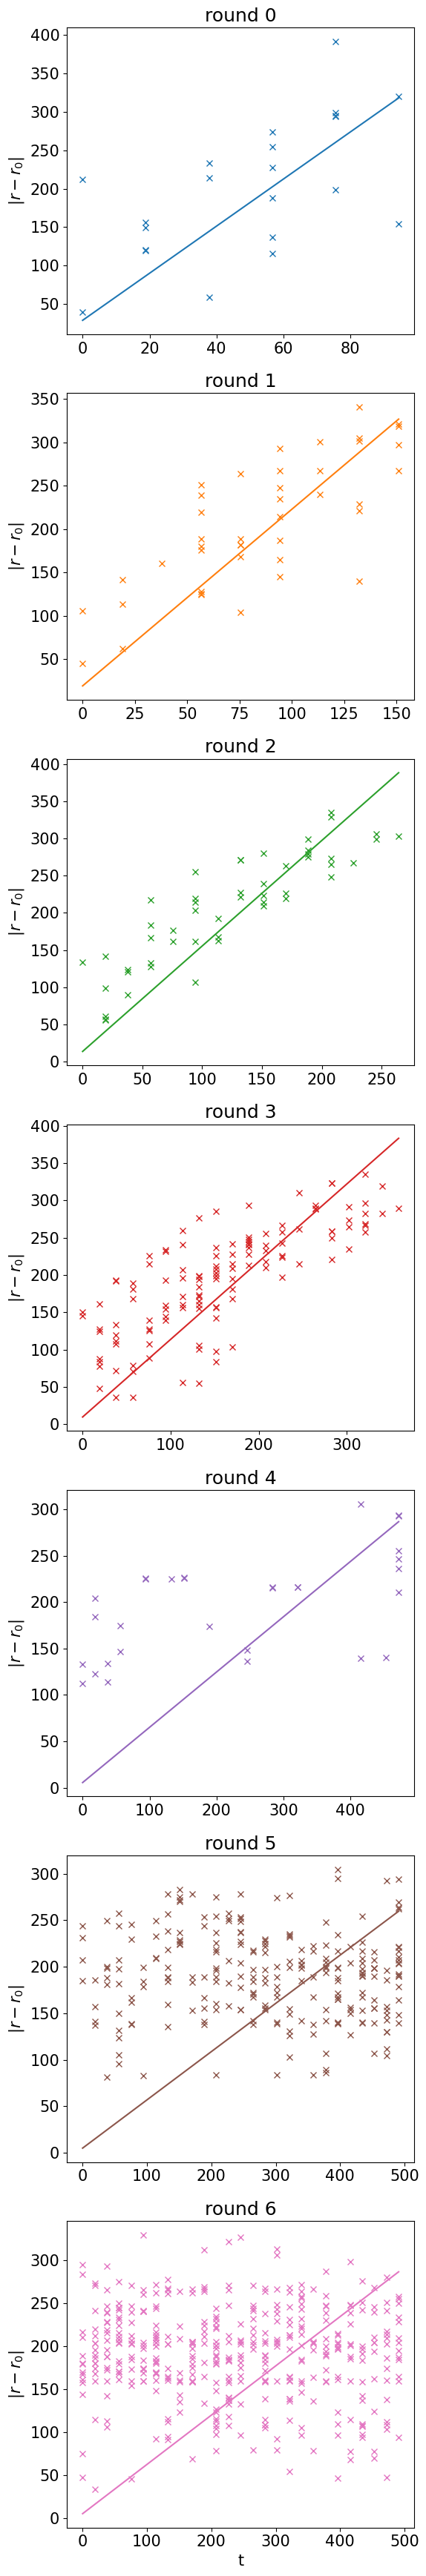

(7, 5)
[[60872.39  29305.159   120.711    -9.44      3.063     5.   ]
 [60893.911 29317.304   160.673    -9.44      2.037     6.   ]
 [60912.825 29332.026   130.411    -9.44      1.42      7.   ]
 [60921.462 29342.03    121.056    -9.44      1.041     8.   ]
 [60954.189 29477.874    90.949    -9.44      0.595     9.   ]
 [60959.648 29403.685    27.853    -9.44      0.519    10.   ]
 [60993.17  29397.736    61.577    -9.44      0.572    11.   ]]


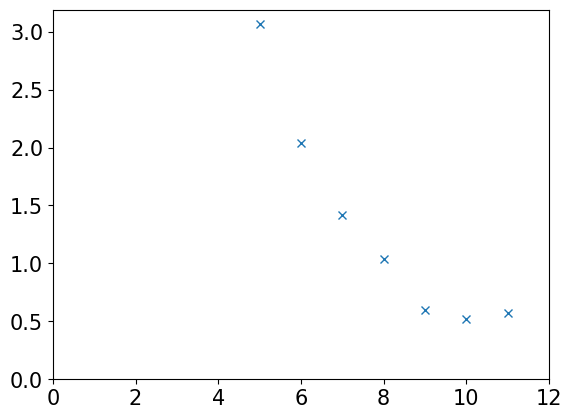

In [22]:
start_diff = 0 
end_diff = 0 

fits = p.gradient_fit(surface=surface, z_cutoff=z_cutoff, t_cutoff=500, 
                    start_diff=start_diff, end_diff=end_diff, 
                      plot=True, label=filename[5:-4])
fits = np.array(fits)

first_round = p.initial_round_number()
round_numbers = first_round + np.arange(start_diff, len(p.rounds)+end_diff)

print(fits.shape)
fits = np.append(fits, round_numbers[:, np.newaxis], axis=1)
print(fits)

# np.save('{}_fits.npy'.format(filename[:-4]), fits)


first_round = p.initial_round_number()

plt.plot(np.arange(start_diff, len(p.rounds)+end_diff)+first_round, fits[:, 4], 'x')
plt.xlim([0, len(p.rounds)+first_round])
plt.ylim([0, None])
plt.show()